# <font color='blue'>Files -- Basic I/O</font>

<font color='blue'>You can open a text file (for reading/writing) using the built-in `open` function. This returns a file object that allows you to read data from the file, and/or write data to the file. Once you are finished with the file, use the `.close()` method to flush any changes to the file, saving them to disk.<br><br>

To open a file use the following syntax:<br>
`file = open(file_name, mode='r')`<br><br>
There are several modes available:<br>
   `r`: open an existing file for reading (default)<br>
   `r+`: open an existing file for reading and writing<br>
   `w`: create a new file for writing (existing files truncated)<br>
   `w+`: create a new file for reading and writing (existing files truncated)<br>
   `x`/`x+`: like `w`/`w+` but returns an error if a file already exists<br>
   `a`: append to the end of an existing file or a new file<br>
   `a+`: read from and append to an existing file, or create a new file for writing/reading<br><br>
Confused? Me too. Thankfully, someone made a nice flowchart (excluding `x`/`x+`, but that's just a variant of `w`/`w+`):<br><br>
    
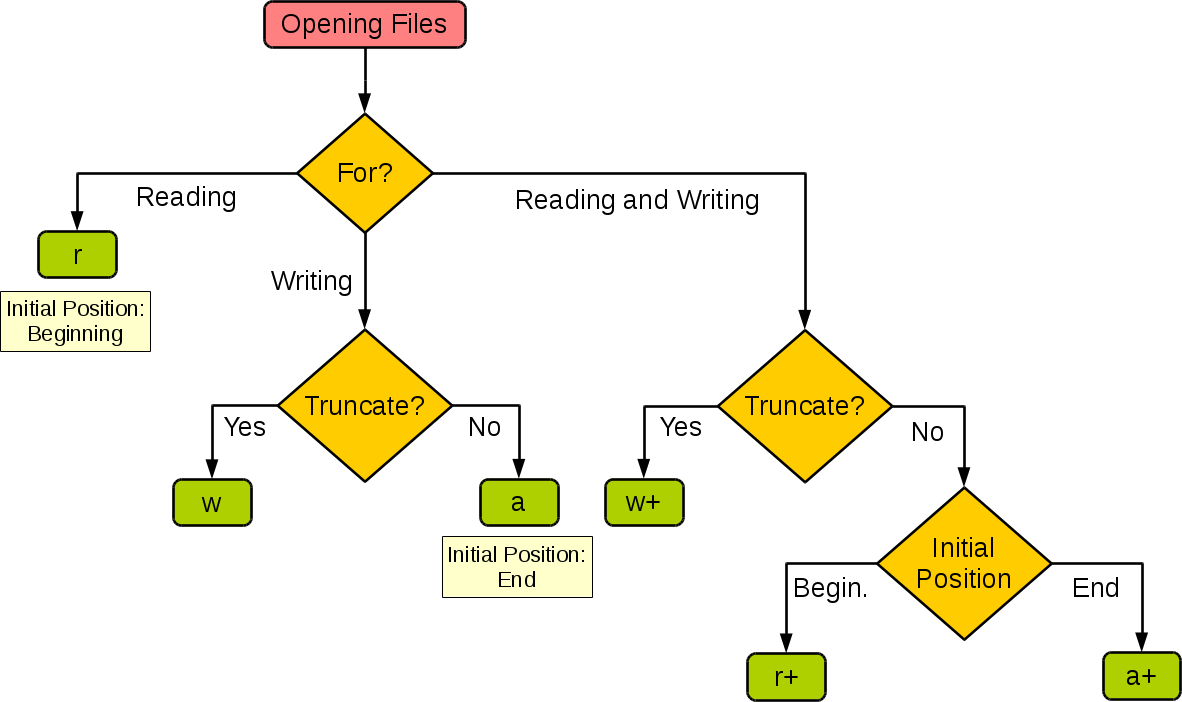<br>

https://stackoverflow.com/a/30566011
</font>

<font color='blue'>Let's make a new file, save it, and then read it in again. First, we open the file with `mode='w'`</font>

In [ ]:
file = open('my-new-file.txt', 'w')

<font color='blue'>Now it is open, we can write to it using the `.write()` method of the file object `file`. This returns the size of what has been written to the file.</font>

In [ ]:
file.write('line1')

<font color='blue'>We now have to close the file for stream to be flushed to the file, otherwise the file may still appear empty when you try to open it with another application</font>

In [ ]:
file.close()

<font color='blue'>Now that we've closed it, let's open it again, but this time with `mode='r'` for reading only.</font>

In [ ]:
file = open('my-new-file.txt', 'r')
print(file)

<font color='blue'>Printing the file isn't that easy, unfortunately. Instead, we have to use the `.read()` method. Without any arguments this returns the entire file:</font>

In [ ]:
print(file.read())

<font color='blue'>When you open a file in python with `mode='r'` the pointer starts at the top of the file. By running `.read()` the complete file is read, and the pointer ends up at the end of the file. If we were to do `file.read()` again, the result would be empty, as there is nothing to read beyond the current position of the pointer.</font>

In [ ]:
print(file.read())

<font color='blue'>The current position of the pointer can be checked using the `.tell()` method. We can see that it's at byte 5 in our file, at the end.</font>

In [ ]:
print(file.tell())

<font color='blue'>We can move the pointer by using the `.seek(offest, [whence])` method. `.seek()` accepts two arguments: `offset`, the position to seek to and `whence`, if the offset is absolute `0` (default), relative to the current position `1` or relative to the end of the file `2`. Let's go back to the start of file, and try and read it again</font>

In [ ]:
file.seek(0)
print(file.read())

<font color='blue'>Using this functionality you can open files seek to a specific location and insert additional text.</font>

In [ ]:
file.close() # Good housekeeping

<font color='blue'>It is more likley that you are going to be dealing with files that have multiple lines. There are a couple of ways to read these files in a useful way. Let's replace our file from before with a new one with multiple lines.</font>

In [ ]:
file = open('my-new-file.txt', 'w')
file.write('line1\nline2\nline3\nline4\nline5')
file.close()

<font color='blue'>and let's open it again, and read it into a variable.</font>

In [ ]:
file = open('my-new-file.txt', 'r')
data = file.read()
print(data)
file.close()

<font color='blue'>That read the entire file in one go. Since this is a string, you could use the `.split()` method discused previously to split the lines into different strings, for example:</font>

In [ ]:
print(data.split('\n'))

<font color='blue'>Alternatively, we can read one line of the file at a time with the `.readline()` method, and append it onto a list:</font>

In [ ]:
lines = [] # Create an empty list to store the lines
file = open('my-new-file.txt', 'r')
for line in file:
    lines.append(line)
file.close()
print(lines)

<font color='blue'>Note that the newline character remains in this case? We can remove those by simply applying the `.strip()` string method</font>

In [ ]:
lines = []
file = open('my-new-file.txt', 'r')
for line in file:
    lines.append(line.strip())
file.close()
print(lines)

<font color='blue'>This way of reading a file line by line can be useful if you want to perform some actions based on the contents of each line. For example, it may be a list of coordinates and you want to perform some analysis a line at a time.</font>

<font color='blue'>A final note on basic reading/writing. In order to avoid having to close the file after you have finished reading or writing, you can open a file using a `with` statement. This will automatically close the file, flushing any changes to the file on disk, once the code within the `with` satement is executed.</font>

In [ ]:
with open('my-new-file.txt') as file:
    print(file.read())

In [ ]:
print(file.closed) # Is the file closed?

<font color='blue'>The code inside the where statement can be as complex as you like</font>

In [ ]:
with open('my-new-file.txt') as file:
    lines = []
    for line in file:
        lines.append(line.strip())

print(lines)

## <font color='green'>Exercises</font>

<font color='green'>Load the file `vizier-example.tsv` for reading and read the file into three separate lists, one for each column, skipping the header lines starting with `#`. Here we can use string indexing to check the first character in each line, and the `.split()` method to split the string by the delimiter (`;`).</font>

In [ ]:
filename = 'vizier-example.tsv'
with open(filename) as file:
    print(file.read())

<font color='green'>Modify the script from the previous example so that the header values are saved separately from the numerical values into a separate variable. You can use this handy `isfloat()` function to test if a given string contains a number (integer/float/exponent) from https://stackoverflow.com/a/20929881. Note that a string like this `1.0; 2.0; 3.0` will return False.</font>

In [ ]:
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

In [ ]:
print(isfloat('1'), isfloat('     1.1'), isfloat('banana'))

<font color='green'>Copy the contents of `vizier-example.tsv` to another file by using the `.read()` and `.write()` methods. You can have mutliple files open at the same time if you wanted to read and write line by line, just use a different variable name for the second file object.</font>